In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import tensorflow as tf
from skimage.transform import resize
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [15]:
fpP = "Parasitized/"
fpU = "Uninfected/"

In [16]:


dataP = []
count = 0
for filename in os.listdir(fpP):
    if '.png' in filename:
        count += 1
        if count>100:
            break
        print(filename)
        dataP.append(resize(mpimg.imread(fpP+filename), (199,199,3)))
        


C33P1thinF_IMG_20150619_115740a_cell_162.png
C33P1thinF_IMG_20150619_114756a_cell_182.png
C33P1thinF_IMG_20150619_114756a_cell_180.png
C33P1thinF_IMG_20150619_115740a_cell_161.png
C33P1thinF_IMG_20150619_114756a_cell_179.png
C33P1thinF_IMG_20150619_114756a_cell_181.png
C33P1thinF_IMG_20150619_115740a_cell_163.png
C33P1thinF_IMG_20150619_115808a_cell_205.png


In [17]:
dataU = []
count = 0
for filename in os.listdir(fpU):
    if '.png' in filename:
        count+=1
        if count>100:
            break
        print(filename)
        dataU.append(resize(mpimg.imread(fpU+filename), (199, 199, 3)))

C1_thinF_IMG_20150604_104722_cell_66.png
C1_thinF_IMG_20150604_104722_cell_73.png
C1_thinF_IMG_20150604_104722_cell_15.png
C1_thinF_IMG_20150604_104722_cell_81.png
C1_thinF_IMG_20150604_104722_cell_115.png
C1_thinF_IMG_20150604_104722_cell_60.png
C1_thinF_IMG_20150604_104722_cell_79.png
C1_thinF_IMG_20150604_104722_cell_9.png


In [18]:
dataP = np.array(dataP)
dataU = np.array(dataU)

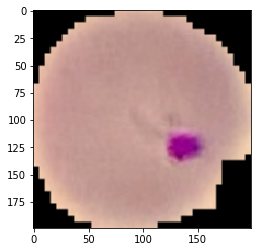

In [19]:
plt.imshow(dataP[0])


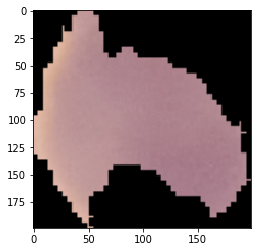

In [20]:
plt.imshow(dataU[0])

In [21]:
dataP /= 255
dataU /= 255

#TODO: Data preprocessing: only use PERCENT_DATA_USED of the train/test images and labels
PERCENT_TRAINED = 0.8
num_P = int(len(dataP) * PERCENT_TRAINED)
num_U = int(len(dataU) * PERCENT_TRAINED)

U_train = dataU[:num_U]
U_test = dataU[num_U:]
P_train = dataP[:num_P]
P_test = dataP[num_P:]


X_train = np.concatenate([list(U_train), list(P_train)])
X_test = np.concatenate([list(U_test), list(P_test)])
y_train = num_U*[0]+num_P*[1] #uninfected is 0, parasitized is 1
y_test = (len(dataU)-num_U)*[0]+(len(dataP)-num_P)*[1]

In [22]:
img_height,img_width = 199,199 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None,
                                            include_top=False,
                                            input_shape= (img_height,img_width,3))

In [23]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [24]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

ValueError: Error when checking target: expected dense_2 to have shape (2,) but got array with shape (1,)